In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

In [21]:
# Definimos las columnas que nos interesan
fields = ['country', 'points','price', 'variety']

# Cargamos el DataFrame solo con esas columnas
wine_reviews = pd.read_csv('wine_reviews.csv', usecols = fields)
wine_reviews.head()

,country,points,price,variety
0,Italy,87,NaN,White Blend
1,Portugal,87,15.0,Portuguese Red
2,US,87,14.0,Pinot Gris
3,US,87,13.0,Riesling
4,US,87,65.0,Pinot Noir


### **1** 
Siguiendo lo realizado en el notebook anterior, realice un gráfico scatter plot de precio vs puntaje en el cual diferencie por color el pais de origen de cada vino (Argentina, España o Chile).

In [22]:
ARG_wine_reviews = wine_reviews[wine_reviews['country']=='Argentina']
# Tomamos como coordenadas en x los precios
precio_arg = ARG_wine_reviews.price.values
# Tomamos como coordenadas en y el puntaje de la review
puntos_arg = ARG_wine_reviews.points.values

CHI_wine_reviews = wine_reviews[wine_reviews['country']=='Chile']
# Tomamos como coordenadas en x los precios
precio_chi = CHI_wine_reviews.price.values
# Tomamos como coordenadas en y el puntaje de la review
puntos_chi = CHI_wine_reviews.points.values

ESP_wine_reviews = wine_reviews[wine_reviews['country']=='Spain']
# Tomamos como coordenadas en x los precios
precio_esp = ESP_wine_reviews.price.values
# Tomamos como coordenadas en y el puntaje de la review
puntos_esp = ESP_wine_reviews.points.values

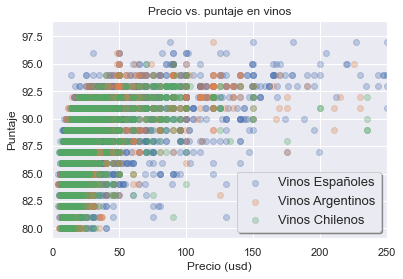

In [23]:
fig = plt.figure()
ax = plt.axes()

# Graficamos putnos semi transparentes, cada uno con el label adecuado

ax.scatter(precio_esp, puntos_esp, label = 'Vinos Españoles',alpha = 0.3)
ax.scatter(precio_arg, puntos_arg, label = 'Vinos Argentinos',alpha = 0.3)
ax.scatter(precio_chi, puntos_chi, label = 'Vinos Chilenos',alpha = 0.3)

ax.set(xlabel='Precio (usd)', ylabel='Puntaje',
       title='Precio vs. puntaje en vinos', xlim = (0,250))

# Agregamos la leyenda al gráfico, la graficamos abajo a la derecha
ax.legend(loc='lower right', shadow=True, fontsize=13)

Para realizar este mismo gráfico con seaborn, solo precisamos una linea de código: 

[Text(0.5, 0, 'Precio (usd)'),
 Text(0, 0.5, 'Puntaje'),
 Text(0.5, 1.0, 'Precio vs. puntaje en vinos'),
 (0.0, 250.0)]

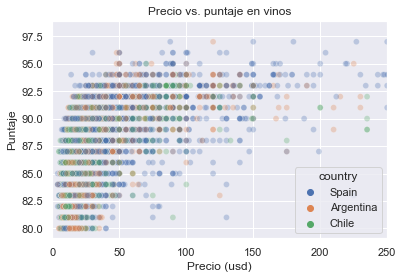

In [24]:
ax = sns.scatterplot(x="price", y="points", hue="country" , data=wine_reviews[wine_reviews['country'].isin(['Argentina','Chile','Spain'])], alpha=0.3)
ax.set(xlabel='Precio (usd)', ylabel='Puntaje',
       title='Precio vs. puntaje en vinos', xlim = (0,250))

En este caso, le estamos indicando a la funcion `scatterplot` que no solo queremos que tome la columna `price` como eje `x` y la columna `points` como eje `y`, sino que además queremos que indique con colores distintos los puntos segun su valor de la columna `country`. Esto lo hacemos mediante el argumento `hue` (`hue="country"`).

Esperamos con estos primeros ejemplos haberlos convencido que el uso de Seaborn facilita la visualización de datos provienentes de un DataFrame respecto a la utilización de (solo) Matplotlib. A continuación vamos a explorar algunas de las funciones de visualización que nos ofrece esta libreria.

Como se puede observar, Seaborn le da automáticamente distintos colores a las categorías y además los separa para poder identificar la cantidad de puntos en cada grupo con facilidad.

### **2**

1. Realizar con Seaborn un gráfico del ancho del petalo según la especie
2. Realizar el mismo gráfico, pero ahora como gráfico de barras. **Pista**: ver el parametro `kind`
3. ¿Que representan las barritas negras?
4. Averiguar la utilidad de los parámetros `ci` y `estimator`.

In [25]:
iris_data = pd.read_csv('iris_dataset.csv')
iris_data = iris_data.drop(columns = ['fila'])
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


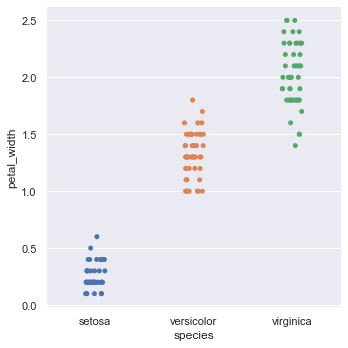

In [26]:
sns.catplot(x='species', y='petal_width', data=iris_data)

In [27]:
iris_data.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

<AxesSubplot:xlabel='species', ylabel='count'>

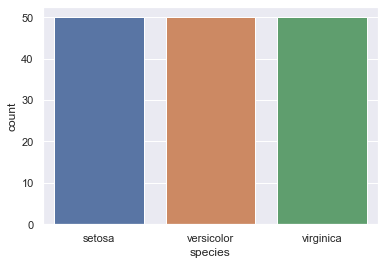

In [28]:
sns.countplot(x='species', data=iris_data)

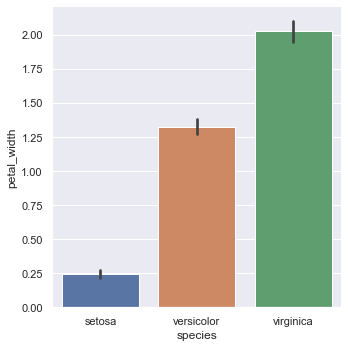

In [21]:
sns.catplot(x='species', y='petal_width', data=iris_data, kind = 'bar')

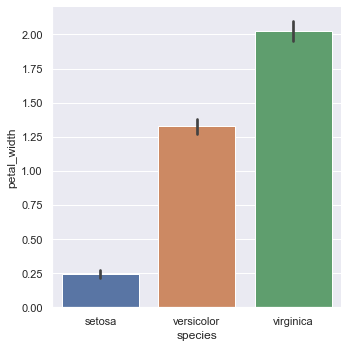

In [30]:
sns.catplot(x='species', y='petal_width', data=iris_data, kind='bar', estimator=np.mean)

In [25]:
iris_data[iris_data['species']=='virginica'].petal_width.mean()

2.0260000000000002

In [26]:
iris_data[iris_data['species']=='virginica'].petal_width.median()

2.0

<AxesSubplot:xlabel='species', ylabel='petal_width'>

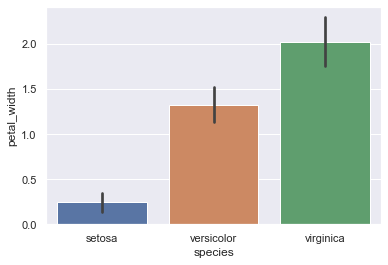

In [23]:
sns.barplot(data = iris_data, x = "species", y = "petal_width", ci = "sd", estimator=np.mean)

<AxesSubplot:xlabel='species', ylabel='petal_width'>

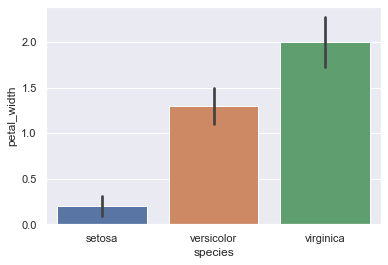

In [24]:
sns.barplot(data = iris_data, x = "species", y = "petal_width", ci = "sd", estimator=np.median)

### **3**

1. En el último gráfico, era difícil visualizar bien los resultados debido a precios que eran mucho más grandes que los demás. ¿Cómo podría solucionar facilmente este problema? 
2. Averigüe cómo cambiar el gráfico si desea que los 3 ejes aparezcan apilados verticalmente en lugar de uno al lado del otro.
3. Averigüe cómo hacer un violin plot y conjeture en qué circunstancias podría ser de utilidad.

In [31]:
wine_reviews_filtro_pais = wine_reviews[wine_reviews['country'].isin(['Argentina','Chile','Spain'])]

(0.0, 100.0)

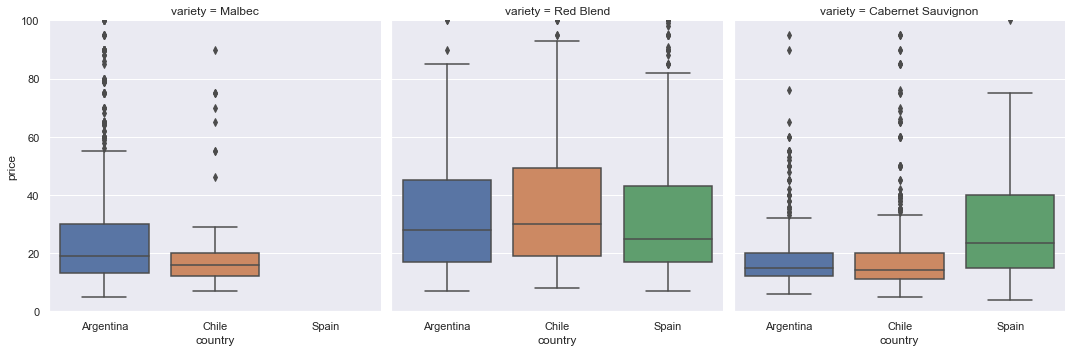

In [41]:
sns.catplot(x="country", y="price", col="variety", kind='box', data=wine_reviews_filtro_pais[wine_reviews_filtro_pais['variety'].isin(['Malbec','Red Blend','Cabernet Sauvignon'])])
plt.ylim(0, 100)

(0.0, 100.0)

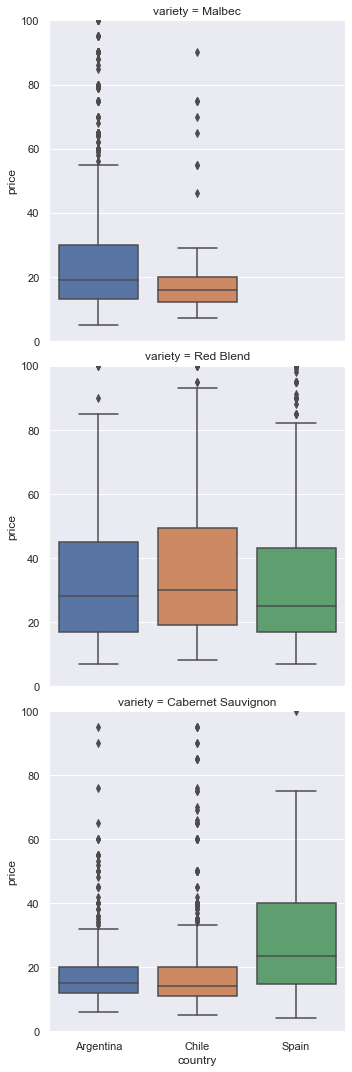

In [42]:
sns.catplot(x="country", y="price", row="variety", kind='box', data=wine_reviews_filtro_pais[wine_reviews_filtro_pais['variety'].isin(['Malbec','Red Blend','Cabernet Sauvignon'])])
plt.ylim(0, 100)

(0.0, 100.0)

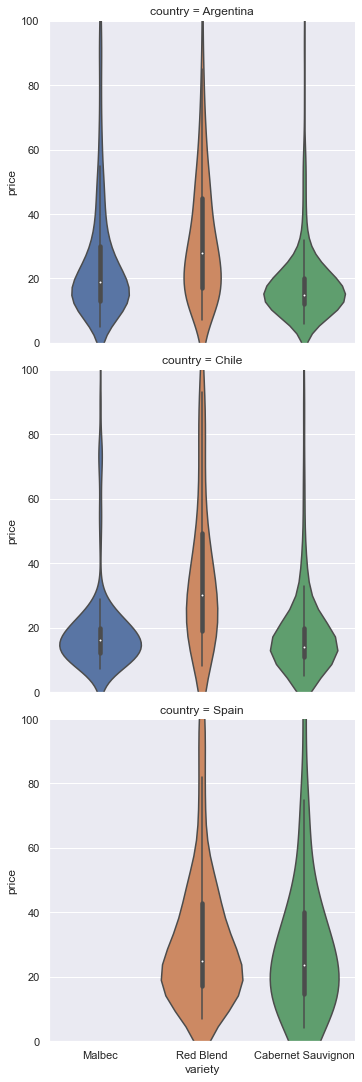

In [51]:
sns.catplot(x="variety", y="price", row="country", kind='violin', data=wine_reviews_filtro_pais[wine_reviews_filtro_pais['variety'].isin(['Malbec','Red Blend','Cabernet Sauvignon'])])
plt.ylim(0, 100)

### **4**

1. Genere un nuevo dataset a partir del dataset de vinos original (wine_reviews) que contenga sólo los vinos cuya variedad es Pinot Noir.
2. Descarte de este dataset las instancias que contengan un `NaN` en alguno de sus campos.
3. Descarte del dataset los vinos con un precio mayor a 200. Para esto pueden generarse una máscara.
4. Graficar en Seaborn un `distplot` con los precios de vinos que contenga el histograma, el KDE y el rugplot.

C:\Users\PC\AppData\Local\Temp\ipykernel_29944\4268439516.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vinos_pinot.dropna(inplace=True)
c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

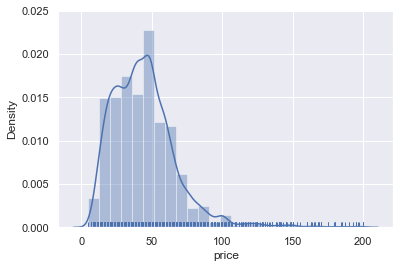

In [38]:
vinos_pinot = wine_reviews[wine_reviews['variety'] == 'Pinot Noir']
vinos_pinot.dropna(inplace=True)
vinos_pinot = vinos_pinot[vinos_pinot['price'] <= 200]
sns.distplot(vinos_pinot['price'], bins=25, rug = True)

C:\Users\PC\AppData\Local\Temp\ipykernel_29944\4263709557.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vinos_pinot.dropna(inplace=True)
c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

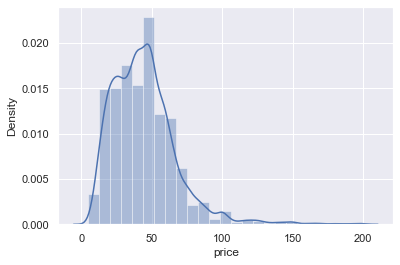

In [37]:
vinos_pinot = wine_reviews[wine_reviews['variety'] == 'Pinot Noir']
vinos_pinot.dropna(inplace=True)
vinos_pinot = vinos_pinot[vinos_pinot['price'] <= 200]
sns.distplot(vinos_pinot['price'], bins=25)

c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price'>

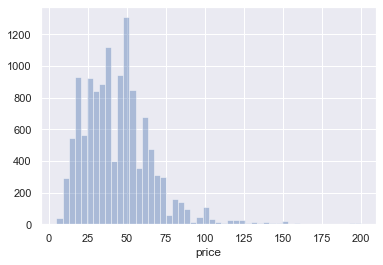

In [46]:
sns.distplot(vinos_pinot['price'], bins=50, kde = False)

c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

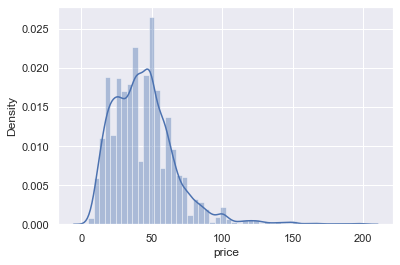

In [43]:
sns.distplot(vinos_pinot['price'], bins=50)

<AxesSubplot:xlabel='points', ylabel='Count'>

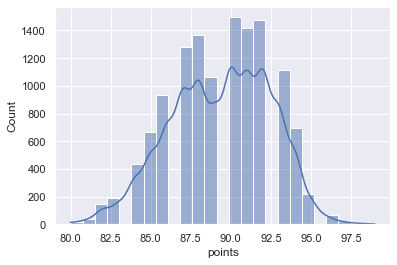

In [44]:
sns.histplot(vinos_pinot['points'], bins=25, kde= True)

<AxesSubplot:xlabel='points', ylabel='Count'>

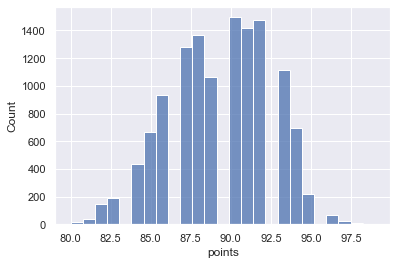

In [45]:
sns.histplot(vinos_pinot['points'], bins=25)

### **5**

1. Graficar un `pairplot` para el dataset de vinos reducido (3 paises y 3 variedades). Antes de hacerlo, ¿cuantas filas y cuantas columans espera que tenga este gráfico?
2. Graficar el mismo `pairplot`, pero esta vez distinga los datos según variedad.
3. Idem al punto anterior, pero distinga según país.

In [47]:
wine_reviews_filtro_pais.head()

,country,points,price,variety
5,Spain,87,15.0,Tempranillo-Merlot
16,Argentina,87,30.0,Malbec
17,Argentina,87,13.0,Malbec
18,Spain,87,28.0,Tempranillo Blend
36,Chile,86,15.0,Viognier-Chardonnay


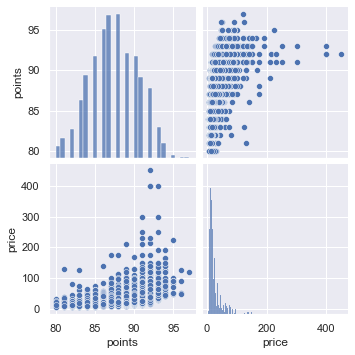

In [49]:
sns.pairplot(data=wine_reviews_filtro_pais[wine_reviews_filtro_pais['variety'].isin(['Malbec','Red Blend','Cabernet Sauvignon'])])

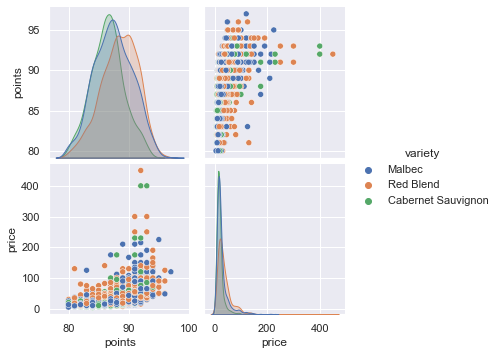

In [50]:
sns.pairplot(data=wine_reviews_filtro_pais[wine_reviews_filtro_pais['variety'].isin(['Malbec','Red Blend','Cabernet Sauvignon'])], hue="variety")

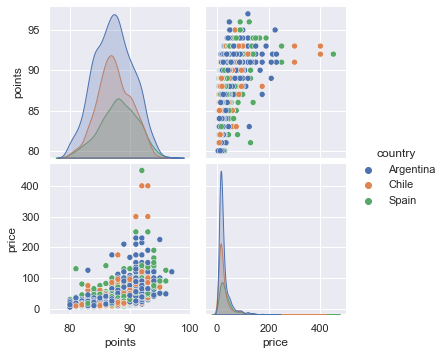

In [51]:
sns.pairplot(data=wine_reviews_filtro_pais[wine_reviews_filtro_pais['variety'].isin(['Malbec','Red Blend','Cabernet Sauvignon'])], hue="country");